Optimization terminated successfully.
         Current function value: 3.884061
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
4.75769400597 0.0462835192443 -0.0462648247898


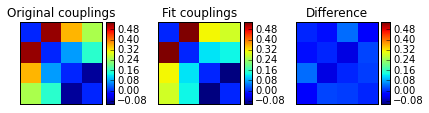

In [185]:
import numpy as np
import theano
import theano.tensor as T
import matplotlib
import matplotlib.pyplot as plt
import time
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import optimize

t1 = time.time()

#Defining varibales
seed = 13
dim = 4
nsamples = 500
rng = np.random.RandomState(seed)



#Generating the original coupling matrix
J = rng.randn(dim, dim)/np.sqrt(dim)
np.fill_diagonal(J, 0.)

J_orig = (J + J.T) / 2.
b_orig = -J_orig.sum(axis = 0)



#Generating a sample of size dim*nsamples using Gibbs sampling method
n_burn_in = dim * 100000
sample_space = dim * 10
total_samples = n_burn_in + sample_space * (nsamples - 1)

units = rng.randint(dim, size=total_samples)
state = rng.binomial(1, .5, size=dim)

samples = np.zeros((nsamples, dim))
sample_idx = 0

for i in xrange(total_samples):
    j = units[i]
    E_acc = 2*state.dot(J_orig[j,:]) + b_orig[j]
    val = 1./(1. + np.exp(-E_acc))
    
    if rng.uniform(size=val.shape) < val:
        state[j] = 0
        state_new = state
    else:
        state[j] = 1
        state_new = state
    if (i >= n_burn_in) and ((i - n_burn_in) % sample_space == 0):
        samples[sample_idx] = state_new
        sample_idx += 1
        
                
#Fitting a Potts model to the generated samples using MPF
J = T.dvector('J')
X = T.bmatrix('X')

J_rav = T.reshape(J, (dim, dim))
b = T.identity_like(J_rav)
diag = T.reshape(b, (1, dim**2))

dummy = T.tile(X, (1, dim))
dummy1 = T.repeat(X, dim, axis=1) 

Kfull = (T.and_(dummy, dummy1) - T.and_(dummy, (1 - dummy1))) * J - diag * J/2
K = T.exp(T.reshape(Kfull, (dim*nsamples, dim)).sum(axis = 1)).mean() * dim #- 0.011 * abs(J - diag * J).sum()
dK = T.grad(K, J)

f = theano.function([J, X], [K, dK], allow_input_downcast=True)


init_vec = np.zeros(dim**2)
res = optimize.minimize(f, init_vec, args=(samples,), jac=True,options={'maxiter':1e+5,'disp':True})
 

J_fit = res.x.reshape(dim, dim)
np.fill_diagonal(J_fit, 0)
J_fit = (J_fit + J_fit.T)/2.



#Plotting   
J_diff = (J_orig - J_fit)
minJ = np.min([J_fit.min(), J_orig.min(), J_diff.min()])
maxJ = np.max([J_fit.max(), J_orig.max(), J_diff.max()])
fig, axes = plt.subplots(nrows=1, ncols=3)
plt.tight_layout(pad=0.4, w_pad=1.5, h_pad=2.0)


ax = axes[0]
ax.set_yticks([])
ax.set_xticks([10, 20, 30, 40])
im = ax.imshow(J_orig, vmin=minJ, vmax=maxJ, interpolation='nearest')
ax.set_title('Original couplings')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.05)
plt.colorbar(im, cax=cax)

ax = axes[1]
ax.set_yticks([])
ax.set_xticks([10, 20, 30, 40])
im = ax.imshow(J_fit, vmin=minJ, vmax=maxJ, interpolation='nearest')
ax.set_title('Fit couplings')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.05)
plt.colorbar(im, cax=cax)

ax = axes[2]
ax.set_yticks([])
ax.set_xticks([10, 20, 30, 40])
im = ax.imshow(J_diff, vmin=minJ, vmax=maxJ, interpolation='nearest')
ax.set_title('Difference')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.05)
plt.colorbar(im, cax=cax)

plt.tight_layout()

t2 = time.time()

print t2-t1, J_diff.max(), J_diff.min()

plt.show()

Optimization terminated successfully.
         Current function value: 37.760411
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
388.01230216 0.0281049793499 -0.0340371841287


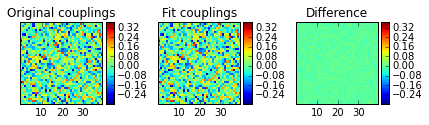

In [69]:
import numpy as np
import theano
import theano.tensor as T
import matplotlib
import matplotlib.pyplot as plt
import time
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import optimize

t1 = time.time()

#Defining varibales
seed = 13
dim = 40
nsamples = 50000
rng = np.random.RandomState(seed)



#Generating the original coupling matrix
J = rng.randn(dim, dim)/np.sqrt(dim)
np.fill_diagonal(J, 0.)

J_orig = (J + J.T) / 2.
b_orig = -J_orig.sum(axis = 0)



#Generating a sample of size dim*nsamples using Gibbs sampling method
n_burn_in = dim * 100000
sample_space = dim * 10
total_samples = n_burn_in + sample_space * (nsamples - 1)

units = rng.randint(dim, size=total_samples)
state = rng.binomial(1, .5, size=dim)

samples = np.zeros((nsamples, dim))
sample_idx = 0

for i in xrange(total_samples):
    j = units[i]
    E_acc = 2*state.dot(J_orig[j,:]) + b_orig[j]
    val = 1./(1. + np.exp(E_acc))
    
    if rng.uniform(size=val.shape) < val:
        state[j] = 1
        state_new = state
    else:
        state[j] = 0
        state_new = state
    if (i >= n_burn_in) and ((i - n_burn_in) % sample_space == 0):
        samples[sample_idx] = state_new
        sample_idx += 1
        
                
#Fitting a Potts model to the generated samples using MPF
J = T.dvector('J')
X = T.bmatrix('X')

J_rav = T.reshape(J, (dim, dim))
b = T.identity_like(J_rav)
diag = T.reshape(b, (1, dim**2))

dummy = T.tile(X, (1, dim))
dummy1 = T.repeat(X, dim, axis=1) 


Kfull = (T.switch(T.eq(dummy, dummy1), 1, 0) - T.switch(T.eq(dummy , (1 - dummy1)), 1, 0)) * J  - diag * J
K = T.exp(T.reshape(Kfull, (dim*nsamples, dim)).sum(axis = 1)).mean() * dim 
dK = T.grad(K, J)

f = theano.function([J, X], [K, dK], allow_input_downcast=True)


init_vec = np.zeros(dim**2)
res = optimize.minimize(f, init_vec, args=(samples,), jac=True,options={'maxiter':1e+5,'disp':True})
 

J_fit = res.x.reshape(dim, dim)
np.fill_diagonal(J_fit, 0)
J_fit = (J_fit + J_fit.T)



#Plotting   
J_diff = (J_orig - J_fit)
minJ = np.min([J_fit.min(), J_orig.min(), J_diff.min()])
maxJ = np.max([J_fit.max(), J_orig.max(), J_diff.max()])
fig, axes = plt.subplots(nrows=1, ncols=3)
plt.tight_layout(pad=0.4, w_pad=1.5, h_pad=2.0)


ax = axes[0]
ax.set_yticks([])
ax.set_xticks([10, 20, 30, 40])
im = ax.imshow(J_orig, vmin=minJ, vmax=maxJ, interpolation='nearest')
ax.set_title('Original couplings')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.05)
plt.colorbar(im, cax=cax)

ax = axes[1]
ax.set_yticks([])
ax.set_xticks([10, 20, 30, 40])
im = ax.imshow(J_fit, vmin=minJ, vmax=maxJ, interpolation='nearest')
ax.set_title('Fit couplings')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.05)
plt.colorbar(im, cax=cax)

ax = axes[2]
ax.set_yticks([])
ax.set_xticks([10, 20, 30, 40])
im = ax.imshow(J_diff, vmin=minJ, vmax=maxJ, interpolation='nearest')
ax.set_title('Difference')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.05)
plt.colorbar(im, cax=cax)

plt.tight_layout()

t2 = time.time()

print t2-t1, J_diff.max(), J_diff.min()

plt.show()

Optimization terminated successfully.
         Current function value: 3.892815
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
26.4570391178 0.0292531128415 -0.0135126458488


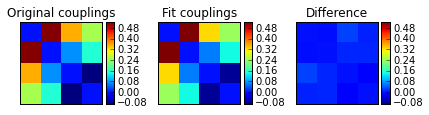

In [214]:
import numpy as np
import theano
import theano.tensor as T
import matplotlib
import matplotlib.pyplot as plt
import time
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import optimize

t1 = time.time()

#Defining varibales
seed = 13
dim = 4
nsamples = 50000
rng = np.random.RandomState(seed)



#Generating the original coupling matrix
J = rng.randn(dim, dim)/np.sqrt(dim)
np.fill_diagonal(J, 0.)

J_orig = (J + J.T) / 2.
b_orig = -J_orig.sum(axis = 0)



#Generating a sample of size dim*nsamples using Gibbs sampling method
n_burn_in = dim * 100000
sample_space = dim * 10
total_samples = n_burn_in + sample_space * (nsamples - 1)

units = rng.randint(dim, size=total_samples)
state = rng.choice([0, 1], size = dim, p = [0.5,0.5])

samples = np.zeros((nsamples, dim))
sample_idx = 0

for i in xrange(total_samples):
    j = units[i]
    E_acc = 2*state.dot(J_orig[j,:]) + b_orig[j]
    val = 1./(np.exp(E_acc) +  1 + 0 * np.exp(-E_acc))
    
    if rng.uniform(size=val.shape) < val: #* np.exp(-E_acc)
        state[j] = 1
        state_new = state
    else:
        state[j] = 0
        state_new = state
    if (i >= n_burn_in) and ((i - n_burn_in) % sample_space == 0):
        samples[sample_idx] = state_new
        sample_idx += 1
        
#Fitting a Potts model to the generated samples using MPF
J = T.dvector('J')
X = T.bmatrix('X')

J_rav = T.reshape(J, (dim, dim))
b = T.identity_like(J_rav)
diag = T.reshape(b, (1, dim**2))

dummy = T.tile(X, (1, dim))
dummy1 = T.repeat(X, dim, axis=1) 


Kfull = (T.switch(T.eq(dummy, dummy1), 1, 0) - T.switch(T.eq(dummy , 1 - dummy1), 1, 0)) * J  - diag * J
K = T.exp(T.reshape(Kfull, (dim*nsamples, dim)).sum(axis = 1)).mean() * dim 
dK = T.grad(K, J)

f = theano.function([J, X], [K, dK], allow_input_downcast=True)


init_vec = np.zeros(dim**2)
res = optimize.minimize(f, init_vec, args=(samples,), jac=True,options={'maxiter':1e+5,'disp':True})
 

J_fit = res.x.reshape(dim, dim)
np.fill_diagonal(J_fit, 0)
J_fit = (J_fit + J_fit.T)



#Plotting   
J_diff = (J_orig - J_fit)
minJ = np.min([J_fit.min(), J_orig.min(), J_diff.min()])
maxJ = np.max([J_fit.max(), J_orig.max(), J_diff.max()])
fig, axes = plt.subplots(nrows=1, ncols=3)
plt.tight_layout(pad=0.4, w_pad=1.5, h_pad=2.0)


ax = axes[0]
ax.set_yticks([])
ax.set_xticks([10, 20, 30, 40])
im = ax.imshow(J_orig, vmin=minJ, vmax=maxJ, interpolation='nearest')
ax.set_title('Original couplings')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.05)
plt.colorbar(im, cax=cax)

ax = axes[1]
ax.set_yticks([])
ax.set_xticks([10, 20, 30, 40])
im = ax.imshow(J_fit, vmin=minJ, vmax=maxJ, interpolation='nearest')
ax.set_title('Fit couplings')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.05)
plt.colorbar(im, cax=cax)

ax = axes[2]
ax.set_yticks([])
ax.set_xticks([10, 20, 30, 40])
im = ax.imshow(J_diff, vmin=minJ, vmax=maxJ, interpolation='nearest')
ax.set_title('Difference')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.05)
plt.colorbar(im, cax=cax)

plt.tight_layout()

t2 = time.time()

print t2-t1, J_diff.max(), J_diff.min()

plt.show()

Optimization terminated successfully.
         Current function value: 2.988961
         Iterations: 47
         Function evaluations: 48
         Gradient evaluations: 48
34.544811964 0.0275136225638 0.0


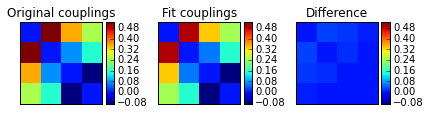

In [225]:
import numpy as np
import theano
import theano.tensor as T
import matplotlib
import matplotlib.pyplot as plt
import time
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import optimize

t1 = time.time()

#Defining varibales
seed = 13
dim = 4
nsamples = 50000
rng = np.random.RandomState(seed)



#Generating the original coupling matrix
J = rng.randn(dim, dim)/np.sqrt(dim)
np.fill_diagonal(J, 0.)

J_orig = (J + J.T) / 2.
b_orig = -J_orig.mean(axis = 0)



#Generating a sample of size dim*nsamples using Gibbs sampling method
n_burn_in = dim * 100000
sample_space = dim * 10
total_samples = n_burn_in + sample_space * (nsamples - 1)

units = rng.randint(dim, size=total_samples)
state = rng.binomial(1, .5, size=dim)
state[state == 0] = -1

samples = np.zeros((nsamples, dim))
sample_idx = 0

for i in xrange(total_samples):
    j = units[i]
    E_acc = 2*state.dot(J_orig[j, :]) + b_orig[j]
    val = 1./(np.exp(E_acc) +  np.exp(-E_acc))
    
    if rng.uniform(size=val.shape) < val * np.exp(-E_acc):
        state[j] = 1
        state_new = state
    else:
        state[j] = -1
        state_new = state
    if (i >= n_burn_in) and ((i - n_burn_in) % sample_space == 0):
        samples[sample_idx] = state_new
        sample_idx += 1
        
#Fitting a Potts model to the generated samples using MPF
J = T.dvector('J')
X = T.bmatrix('X')

J_rav = T.reshape(J, (dim, dim))
b = T.identity_like(J_rav)
diag = T.reshape(b, (1, dim**2))

dummy = T.tile(X, (1, dim))
dummy1 = T.repeat(X, dim, axis=1) 


Kfull = (T.switch(T.eq(dummy, dummy1), 1, 0) - T.switch(T.eq(dummy , - dummy1), 1, 0)) * J  - diag * J
K = T.exp(T.reshape(Kfull, (dim*nsamples, dim)).sum(axis = 1)).mean() * dim 
dK = T.grad(K, J)

f = theano.function([J, X], [K, dK], allow_input_downcast=True)


init_vec = np.zeros(dim**2)
res = optimize.minimize(f, init_vec, args=(samples,), jac=True,options={'maxiter':1e+5,'disp':True})
 

J_fit = res.x.reshape(dim, dim)
np.fill_diagonal(J_fit, 0)
J_fit = (J_fit + J_fit.T)/4.



#Plotting   
J_diff = (J_orig - J_fit)
minJ = np.min([J_fit.min(), J_orig.min(), J_diff.min()])
maxJ = np.max([J_fit.max(), J_orig.max(), J_diff.max()])
fig, axes = plt.subplots(nrows=1, ncols=3)
plt.tight_layout(pad=0.4, w_pad=1.5, h_pad=2.0)


ax = axes[0]
ax.set_yticks([])
ax.set_xticks([10, 20, 30, 40])
im = ax.imshow(J_orig, vmin=minJ, vmax=maxJ, interpolation='nearest')
ax.set_title('Original couplings')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.05)
plt.colorbar(im, cax=cax)

ax = axes[1]
ax.set_yticks([])
ax.set_xticks([10, 20, 30, 40])
im = ax.imshow(J_fit, vmin=minJ, vmax=maxJ, interpolation='nearest')
ax.set_title('Fit couplings')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.05)
plt.colorbar(im, cax=cax)

ax = axes[2]
ax.set_yticks([])
ax.set_xticks([10, 20, 30, 40])
im = ax.imshow(J_diff, vmin=minJ, vmax=maxJ, interpolation='nearest')
ax.set_title('Difference')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.05)
plt.colorbar(im, cax=cax)

plt.tight_layout()

t2 = time.time()

print t2-t1, J_diff.max(), J_diff.min()

plt.show()